### Metadata

In [41]:
#import modules
import pandas as pd  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
%matplotlib inline 
#magic command in Jupyter Notebook that allows the plots to be displayed directly in the notebook

In [42]:
df=pd.read_csv(r"C:\Users\angie\OneDrive\Desktop\Jupyter\raw files\HR_comma_sep.csv")
df.head() # displays first 5 observations

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [43]:
df.tail() # displays last 5 observations

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [44]:
df.info() #3 different data types (2 floats, 6 integers, 2 objects) & all non-null values (complete data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [45]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [46]:
# satisfaction_level: It is employee satisfaction point, which ranges from 0-1
# last_evaluation: It is evaluated performance by the employer, which also ranges from 0-1
# number_projects: How many numbers of projects assigned to an employee
# average_monthly_hours: How many average numbers of hours worked by an employee in a month
# time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.
# work_accident: Whether an employee has had a work accident or not.
# promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.
# Departments: Employee's working department/division.
# Salary: Salary level of the employee such as low, medium and high.
# left: Whether the employee has left the company or not.

In [47]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Data Insights

In [48]:
# Check how many ppl left the company - first two groups stayed & left
left = df.groupby('left')
left.mean(numeric_only=True)
#Employees who left (1) the company had low satisfaction level, low promotion rate, low salary, and worked more compare to who stayed (0) in the company

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [49]:
# in absolute numbers (0 = stayed with company, 1 = left company)
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

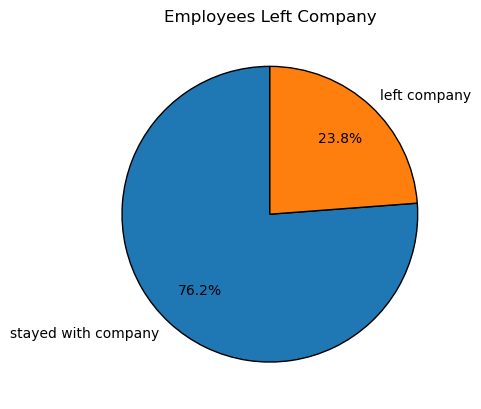

In [50]:
# Display the respective share
left_count = df.groupby('left').count() # and counts the number of occurrences of each value

labels = ['stayed with company', 'left company'] # renames the labels
values = left_count['satisfaction_level'] # y-axis values are the counts of employees who left the company, which are stored in the 'satisfaction_level' column of the left_count

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.7, wedgeprops=dict(edgecolor='black', linewidth=1.0))
# responsible for creating the pie chart with specific configurations. Let's break down each parameter and its functionality:

# values: The data values to be plotted in the pie chart. In this case, it represents the count of employees who stayed with the company and those who left.
# labels: The labels to be displayed for each slice of the pie chart. You have defined the labels as 'stayed with company' and 'left company'.
# autopct: A format string specifying the format for the percentage labels on each slice of the pie chart. In this case, '%1.1f%%' formats the percentage with one decimal place.
# startangle: The angle at which the first slice of the pie chart starts. By setting it to 90 degrees, the 'stayed with company' slice will be positioned at the top.
# pctdistance: The distance of the percentage labels from the center of each slice, expressed as a fraction of the radius. By setting it to 0.85, the labels will appear closer to the outer edge of each slice.
# wedgeprops: A dictionary that allows you to specify properties of the wedges in the pie chart. In this case, you use it to set the edgecolor to 'black' and the linewidth to 1.5, which adds an outer line to each wedge of the pie chart.

plt.title('Employees Left Company')

plt.show()

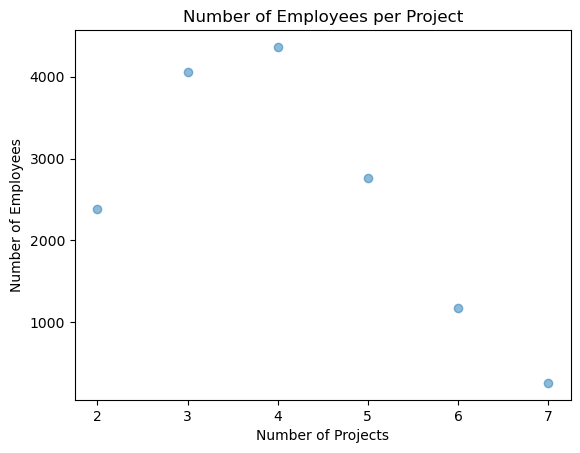

In [51]:
# Number of employees per project - most of the employees are caught up within 3-5 projects.
num_projects = df['number_project'].value_counts().sort_index()

x = num_projects.index
y = num_projects.values

plt.scatter(x, y, alpha=0.5)
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.title('Number of Employees per Project')
plt.show()

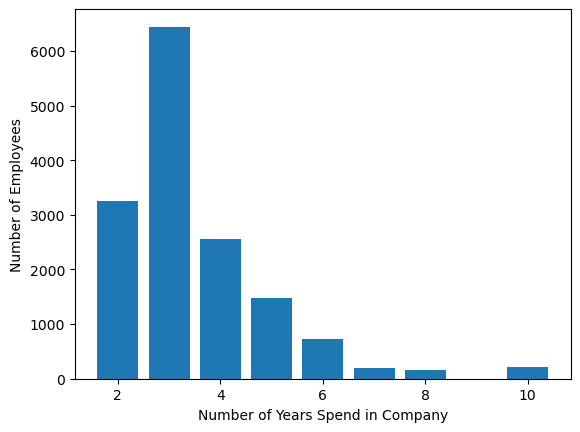

In [52]:
# Average time spent within the company
time_spent=df.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()
# Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee

In [53]:
# Practice subplots using seaborn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


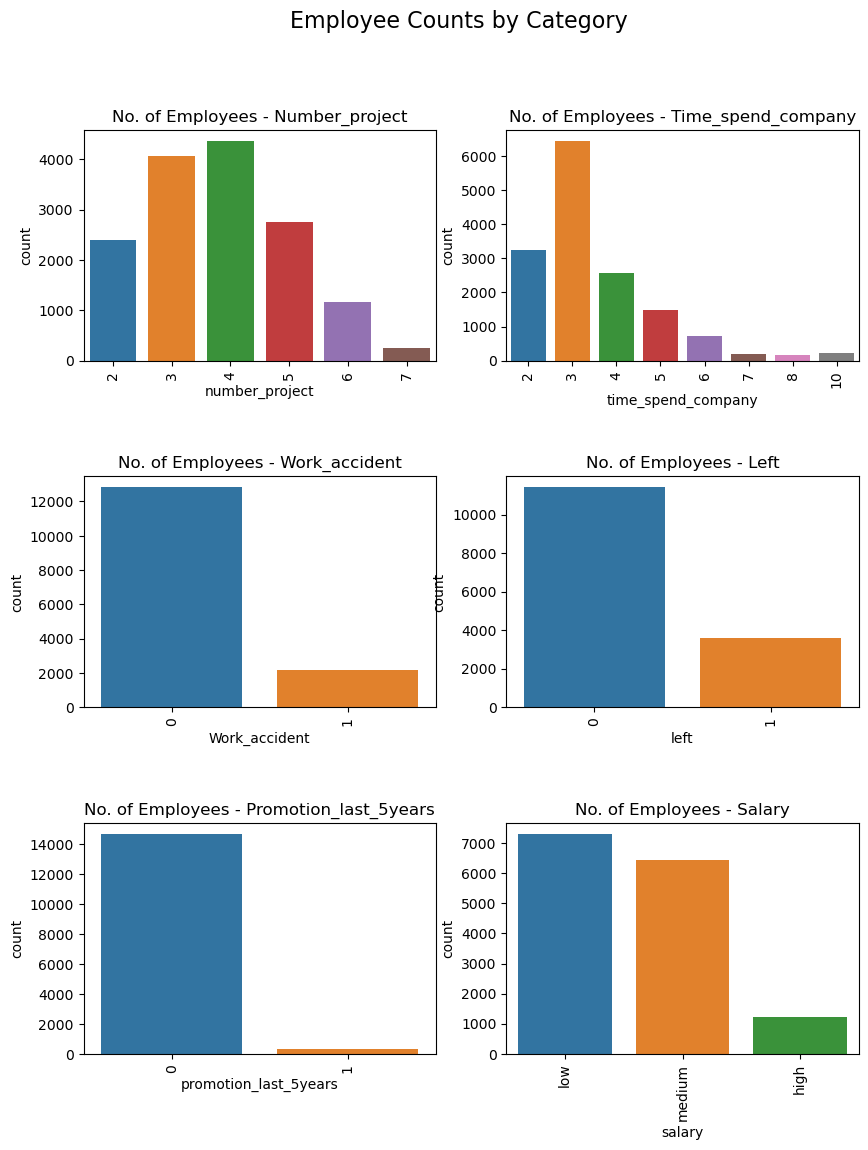

In [54]:
features = ['number_project', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'salary'] # featrure department is left out, because no numeric value
fig, axes = plt.subplots(3, 2, figsize=(10, 12)) #The subplot grid is adjusted to 3 rows and 2 columns to accommodate the features
# The figsize parameter is adjusted to (10, 12) to maintain an appropriate aspect ratio for the revised subplot grid
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features):
    ax = axes[i // 2, i % 2]
    sns.countplot(x=feature, data=df, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"No. of Employees - {feature.capitalize()}")

# Remove any unused subplots
if len(features) < 6: # the if condition for removing unused subplots is updated to check if len(features) < 6, reflecting the reduced number of features
    axes[2, 1].remove()

fig.suptitle("Employee Counts by Category", fontsize=16)
plt.show()


In [55]:
# Insights:
# Most of the employee is doing the project from 3-5.
# There is a huge drop between 3 years and 4 years experienced employee.
# The no of employee left is 23 % of the total employment.
# A decidedly less number of employee get the promotion in the last 5 year.
# The sales department is having maximum no.of employee followed by technical and support
# Most of the employees are getting salary either medium or low.

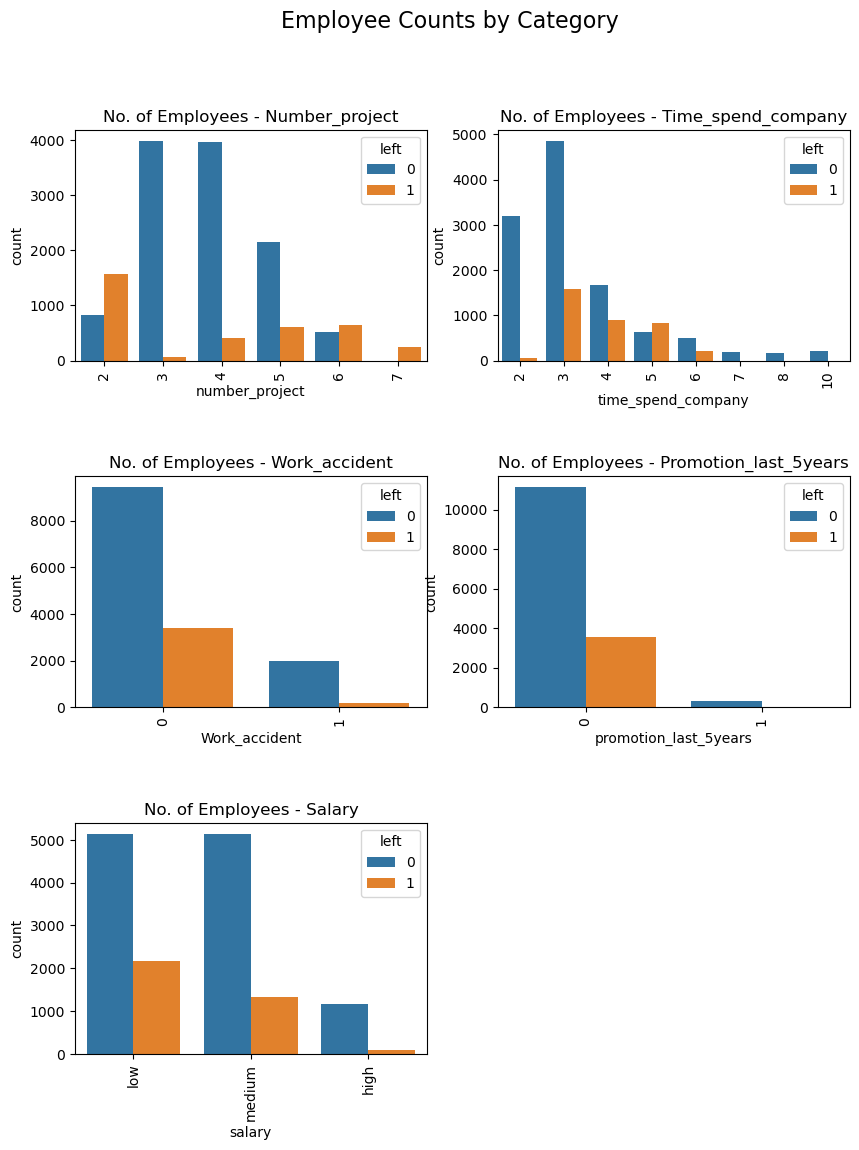

In [56]:
features = ['number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary']
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features):
    ax = axes[i // 2, i % 2]
    sns.countplot(x=feature, data=df, hue='left', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"No. of Employees - {feature.capitalize()}")

# Remove any unused subplots
if len(features) < 6:
    axes[2, 1].remove()

fig.suptitle("Employee Counts by Category", fontsize=16)
plt.show()

In [57]:
# Insights:
# Those employees who have the number of projects more than 5 were left the company.
# The employee who had done 6 and 7 projects, left the company it seems to like that they were overloaded with work.
# The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.
# Those who promotion in last 5 years they didn't leave, i.e., all those left they didn't get the promotion in the previous 5 years.

#### Data Analysis and Visualization Summary:
##### Following features are most influencing a person to leave the company:

Promotions: Employees are far more likely to quit their job if they haven't received a promotion in the last 5 years.
Time with Company: Here, The three-year mark looks like a time to be a crucial point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.
Number Of Projects: Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3-5 projects are less likely to leave the company. The employee with less and more number of projects are likely to leave.
Salary: Most of the employees that quit among the mid or low salary groups.

### Cluster Analysis

In [58]:
# Find employee groups that left the company
from sklearn.cluster import KMeans #using scikit-learn library to perform K-means clustering on a datase
left_emp =  df[['satisfaction_level', 'last_evaluation']][df.left == 1] # filters the data by selecting only the 'satisfaction_level' and 'last_evaluation' columns where the 'left' column equals 1
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init=10).fit(left_emp) # creates three clusters using the KMeans algorithm with a random state of 0 and fits the 'left_emp' data to the model & stores result in kmeans variable
# n_init=10 is necessary to specify the number of initializations for the K-means algorithm. This aligns with the upcoming default change in scikit-learn's version 1.4.

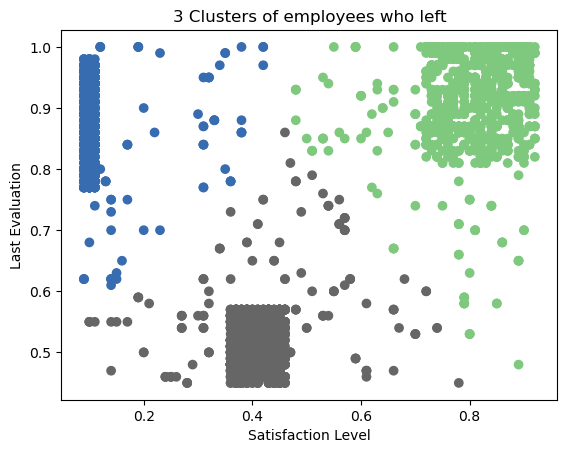

In [59]:
# Visualize the results of a clustering algorithm
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()


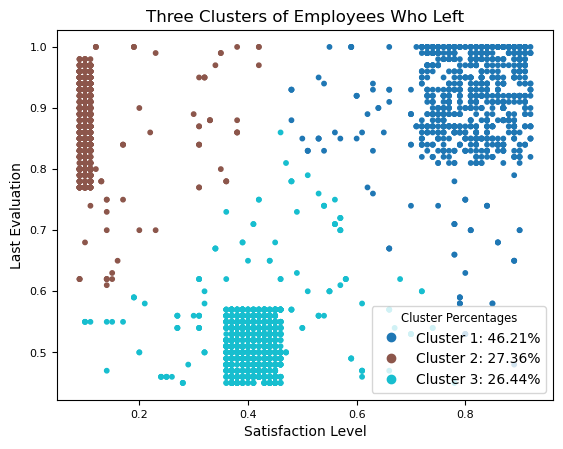

In [60]:
# adding a legend, reducing size of cluster points, and adding different color sceme
# Calculate the percentage of employees in each cluster
cluster_percentages = left_emp['label'].value_counts(normalize=True) * 100

# Add new column "label" and assign cluster labels
left_emp['label'] = kmeans.labels_

# Draw scatter plot
scatter = plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'], cmap='tab10', s=10)
# I used the 'tab10' colormap by setting cmap='tab10' in the scatter function. You can choose from various built-in colormaps or create your own custom colormap using ListedColormap or LinearSegmentedColormap from the matplotlib.colors module
# I set s=10 in the scatter function to reduce the size of the cluster points. You can adjust the value as needed to control the size of the markers
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Three Clusters of Employees Who Left')

# Create a legend with cluster percentages
legend_labels = [f"Cluster {i+1}: {percentage:.2f}%" for i, percentage in enumerate(cluster_percentages)]
legend = plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Cluster Percentages')
plt.setp(legend.get_title(), fontsize='small')  # I used plt.setp() function to set the font size of the legend title to 'small'

# Set marker size for scatter points
scatter.set_sizes([10]) 

# Set font size for scatter point labels -  I used plt.xticks(fontsize=8) and plt.yticks(fontsize=8) to set the font size of the x-axis and y-axis labels of the scatter plot
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()


In [61]:
# Insights:
# High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners (46.21%)
# Low Satisfaction and High Evaluation(Shaded by blue color in the graph), you can also call them Frustrated (27.36%)
# Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match' (26.44%)

### Prediction Model

In [62]:
# Import LabelEncoder - uses the scikit-learn library's preprocessing module to encode categorical variables into numerical values
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder() #creates an instance of the LabelEncoder class and assigns it to the variable 'le'
# Converting string labels into numbers.
df['salary']=le.fit_transform(df['salary']) # uses the fit_transform method of the LabelEncoder object to convert the 'salary' column of the 'data' dataframe from string labels to numerical values
# fit_transform method fits the encoder to the data and then transforms the data into encoded value
df['Departments ']=le.fit_transform(df['Departments ']) # does the same thing for the 'Departments' column of the 'data' dataframe
# this code is useful for preprocessing data before using it in machine learning models, as many models require numerical data rather than categorical data

### Split, Train, and Test Set

In [63]:
# split dataset by using function train_test_split() - necessary to pass 3 parameters features, target, and test_set size + use random_state to select records randomly
# Splitting the data into two parts: features and target variable
X=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']] # features are selected from the 'data' dataframe using the double square brackets notation - features will be used to train a machine learning model
y=df['left'] # target variable left is also selected from the 'data' dataframe using the single square bracket notation
# his code is preparing the data for machine learning by separating the features and target variable

In [64]:
# Import train_test_split function
from sklearn.model_selection import train_test_split # used to split a dataset into a training set and a test set for machine learning purposes

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test
# function is called with four arguments: X, y, test_size, and random_state
# X and y are the input features and target variable, respectively, that make up the dataset
# test_size is the proportion of the dataset that should be allocated to the test set (in this case, 30%)
# random_state is an optional argument that sets the random seed for reproducibility purposes
# function returns four variables: X_train, X_test, y_train, and y_test
# X_train and y_train are the training set input features and target variable, respectively, while X_test and y_test are the test set input features and target variable, respectively
# code is a common preprocessing step in machine learning to ensure that the model is trained on a subset of the data and tested on a separate subset to evaluate its performance

### Build Churn Prediction Model

In [65]:
# predict churn using Gradient Boosting Classifier
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets - code trains the model using the training sets X_train and y_train using the gb.fit(X_train, y_train) statement
gb.fit(X_train, y_train)

#Predict the response for test dataset - code predicts the response for the test dataset using the gb.predict(X_test) statement and stores the predicted values in the y_pred variable
y_pred = gb.predict(X_test)
# code trains a Gradient Boosting Classifier model on a given dataset and uses it to predict the response for a test dataset


### Evaluate Performance

In [66]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # code prints out the accuracy score of the classifier by calling the accuracy_score function from the metrics module and passing in the true labels (y_test) and predicted labels (y_pred)
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred)) # code prints out the precision score of the classifier by calling the precision_score function from the metrics module and passing in the true labels (y_test) and predicted labels (y_pred)
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred)) # code prints out the recall score of the classifier by calling the recall_score function from the metrics module and passing in the true labels (y_test) and predicted labels (y_pred)


Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806


In [67]:
# 97% Accuracy - indicates how often the classifier predicted the correct label - is calculated by dividing the number of correctly predicted labels by the total number of samples -  accuracy score ranges from 0 to 1, where a score of 1 represents a perfect prediction
# 95% Precision -  accuracy score ranges from 0 to 1, where a score of 1 represents a perfect prediction - it calculates the ratio of true positive predictions to the sum of true positive and false positive predictions. Precision focuses on the quality of the positive predictions (precision score ranges from 0 to 1)
# 92% Recall (also known as Sensitivity or True Positive Rate) - measure of the classifier's ability to correctly identify positive samples. It calculates the ratio of true positive predictions to the sum of true positive and false negative predictions. Recall focuses on the coverage of the positive samples (recall score ranges from 0 to 1)